In [1]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def NN2NA(NN):
  rows,columns=NN.shape

  columns_NA=np.count_nonzero(NN)
  if(rows != columns):
    print("Malformed NN Matrix. rows are not equal to columns")
    return none,none
  k=0
  NA=np.zeros((rows,columns_NA))
  arches = ["" for i in range(columns_NA)]

  for i in range(columns):
    for j in range(rows):
      if NN[i,j]==1:
        NA[i,k]=1
        NA[j,k]=-1
        #if i==0:
        #  arches[k]="s->"+str(j+1)
        #elif j==0:
        #  arches[k]=str(i+1)+"->s"
        #elif i==columns-1:
        #  arches[k]="t->"+str(j+1)
        #elif j==columns-1:
        #  arches[k]=str(i+1)+"->t"
        #else:
        #  arches[k]=str(i+1)+"->"+str(j+1)
        arches[k]=(i,j)
        k+=1
  return NA, arches


def get_usage_string(arc_idxs, res_flow, capacity):
    return {arc: '%s/%s' % (flow, cap) for arc, flow, cap in zip(arc_idxs, res_flow, capacity)}

def get_min_cut(arc_idxs, np_res_flow, np_capacity):
    np_capacity = np.where(np_capacity == None, 999, np_capacity)

    idxs = np.argwhere((np_res_flow - np_capacity) == 0)
    return [arc_idxs[i[0]] for i in idxs]


def get_selected_arcs(arc_idxs, selected_arcs):
    arc = []
    for idx, i in enumerate(selected_arcs):
        if np.isclose(i, 1, rtol=1e-05, atol=1e-08, equal_nan=False): # Vecinity
            arc.append(arc_idxs[idx])
    return arc


def Calculate_distance(nodo1,nodo2):
  Distance=(nodo1[0]-nodo2[0])**2+(nodo1[1]-nodo2[1])**2 #The Squared root is not calculated for a quicker calculus
  return Distance


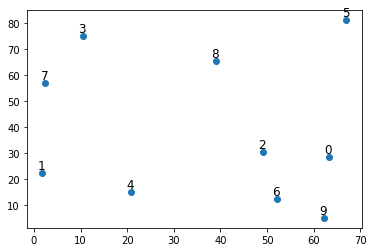

In [3]:
#Definition for creating model
map_size=[100,100]
Q_nodes=10

#Creation of nodes
nodes = tuple([(np.random.uniform()*map_size[0],np.random.uniform()*map_size[1]) for i in range(0, Q_nodes)])
x,y = zip(*nodes)
plt.scatter(x, y)
for i in range(len(x)):
  plt.annotate(i, (x[i] - 1 ,y[i]+1.5), fontsize='large')

#Calculus of NN and NA. Everything connected with everything
NN=np.ones((Q_nodes,Q_nodes))
np.fill_diagonal(NN,0)
NA, arc_idxs = NN2NA(NN)

#Calculation of all distances between nodes
C=[]
for i in range(len(nodes)):
    for j in range(len(nodes)):
      if i!=j:
        C=np.append(C,Calculate_distance(nodes[i],nodes[j]))

Aeq1=np.where(NA==-1, 0, NA) 
Aeq2=np.where(NA==1, 0, NA) 
Aeq2=np.where(Aeq2==-1, 1, Aeq2)
Aeq=np.concatenate((Aeq1,Aeq2),axis=0)

beq=np.ones((Aeq.shape[0],1))


In [4]:


max_q=None
bounds = tuple([(0, max_q) for arcs in range(0, Aeq.shape[1])])

print('## Optimizer inputs ## \n'
      'Cost vector: %s \n\n '
      'Arches in order:\n%s \n\n'
      'A_eq Node-Arc matrix:\n%s \n\n'
      'b_eq demand-supply vector: %s \n\n'
      'Bounds of each X arc variable: %s' % (C,arc_idxs,Aeq, beq, bounds))

## Optimizer inputs ## 
Cost vector: [3834.7500084   207.39927028 4954.47143152 1982.19739091 2776.75253794
  387.7205719  4529.61583888 1957.58032817  550.09223054 3834.7500084
 2307.53301477 2844.4366532   421.12654056 7700.8986001  2644.34623397
 1200.42387769 3251.37236615 3953.06313247  207.39927028 2307.53301477
 3472.13541634 1030.71059602 2882.17420073  338.85078807 2886.04690817
 1327.44773622  815.35027289 4954.47143152 2844.4366532  3472.13541634
 3698.53337481 3225.96806629 5664.67787306  388.53290768  906.19971076
 7558.02872641 1982.19739091  421.12654056 1030.71059602 3698.53337481
 6478.32705653  984.29947096 2102.72675523 2871.09508246 1803.11239909
 2776.75253794 7700.8986001  2882.17420073 3225.96806629 6478.32705653
 4948.54163383 4748.80390993 1021.91079908 5798.23834667  387.7205719
 2644.34623397  338.85078807 5664.67787306  984.29947096 4948.54163383
 4476.23505814 2999.40159348  152.60885505 4529.61583888 1200.42387769
 2886.04690817  388.53290768 2102.72675523

In [5]:
res = linprog(C, A_eq=Aeq, b_eq=beq, bounds=bounds, method='revised simplex')

selarcs = get_selected_arcs(arc_idxs, res.x)


print('The arches are:          :',arc_idxs)
print('The raw solution will be:    %s' % res.x)
print('The arcs that make the shortest path will be (from, to): %s' % selarcs)
print('The minimum cost of this function that considerds lamda will be: %0.2f (it is not representative of the original problem)' % res.fun)

The arches are:          : [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8)]
The raw solution will be:    [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


There are subtours. It is neccesary to generate more restrictions, like D-F-J or M-T-Z propose


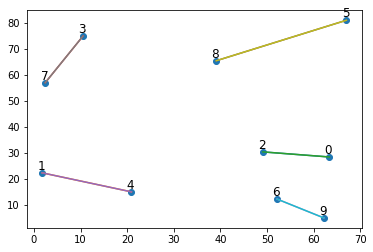

In [6]:
plt.scatter(x,y)

for i,j in selarcs:
  x_values=(x[i],x[j])
  y_values=(y[i],y[j])
  plt.plot(x_values, y_values)


for i in range(len(selarcs)):
  plt.annotate(selarcs[i][0], (x[i] - 1 ,y[i]+1.3), fontsize='large')

print("There are subtours. It is neccesary to generate more restrictions, like D-F-J or M-T-Z propose")
    